# End-to-End Statistical Analysis of Global life Expectancy(WHO)

This notebook explores how socieconomic and health factors relate to **life expectancy** across countries using the WHO-based kaggle dataset - ['life Expectancy (WHO)' by KumarRajarshi](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download)

---

### 🎯 Objectives
This project aims to:
- Perform **Exploratory Data Analysis(EDA)** to understand patterns and relationships.
- Conduct a **Hypothesis Test** comparing developed vs developing countries.
- Build and evaluate a **Linear Regression Model** to predict life expectancy.
- Demonstrate a full **end-to-end statistical analysis workflow**.

---

### 🧠 Skills I'll Practice
- Data cleaning and preparation (handling missing values, numeric conversion).
- Descriptive and inferential statistics (mean, variance, t-tests).
- Visualization and interpretation of patterns.
- Simple regression modeling using **scikit-learn**.

---

### What this notebook explores
- How life expectancy varies across countries and income levels.
- Which features are most strongly associated with life expectancy.
- Whether developed and developing countries differ significantly in average life expectancy.
- How well a linear model can predict life expectancy using socioeconomic indicators.

In [2]:
# import main libraies for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

## Part 1 - Exploratory Data Analysis (EDA)
The goal here is to:
- inspect, clean, and describe the dataset.
- Explore distribution, correlation, and patterns among variables.
- visualize the relationships between life expectancy and key indicators.

In [4]:
# load the dataset
file = 'Life Expectancy Data.csv'
df = pd.read_csv(file)

# Clean column names
df.columns = df.columns.str.strip()

# view data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,"33,736,494.000",17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,"327,582.000",17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,"31,731,688.000",17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,"3,696,958.000",17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,"2,978,599.000",18.200,18.200,0.454,9.500


In [5]:
# Inspect data structure and shape
print('Shape:', df.shape)
print('\nInfo:')
df.info()

Shape: (2938, 22)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  


#### Data Cleaning

In [8]:
# Replace common missing value symbols with NaN
df = df.replace(['N/A', 'na', 'NaN', 'missing', '..', 'unknown', ''], np.nan)

# drop rows where life expectancy is missing
df = df.dropna(subset=['Life expectancy']).copy()

# Fill missing numeric values with each coldumn's median
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())
    
print('After cleaning:', df.shape)

# Save cleaned dataset
df.to_csv('../Desktop/life-expectancy-who/data/life_expectancy_cleaned.csv', index=False)
print('✅'

After cleaning: (2928, 22)


#### Descriptive Statistics

In [8]:
# A simple helper function to summarize any numeric column
def stats_summary(series):
    return pd.Series({
        'Count': series.count(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode()[0] if not series.mode().empty else np.nan,
        'Variance': series.var(),
        'Std Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Skewness': series.skew(),
        'Kurtosis': series.kurt()
    })

stats_summary(df['Life expectancy'])

Count      2,928.000
Mean          69.225
Median        72.100
Mode          73.000
Variance      90.704
Std Dev        9.524
Min           36.300
Max           89.000
Skewness      -0.639
Kurtosis      -0.234
dtype: float64

#### Distribution and Shape of Life Expectancy

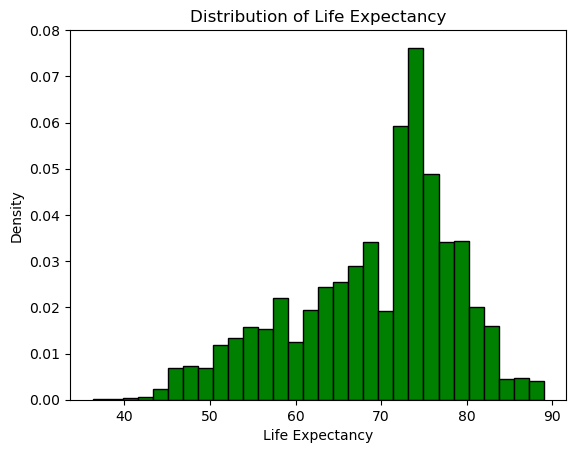

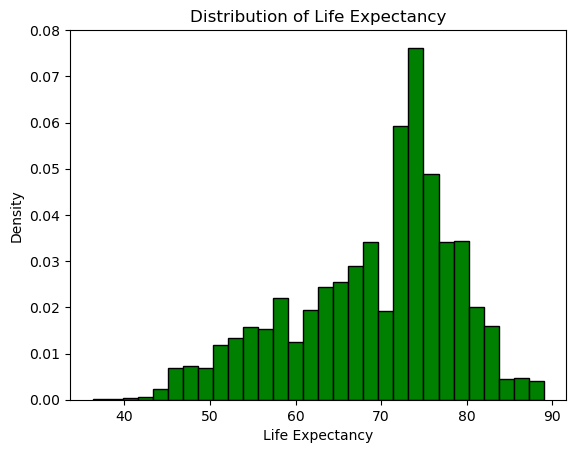

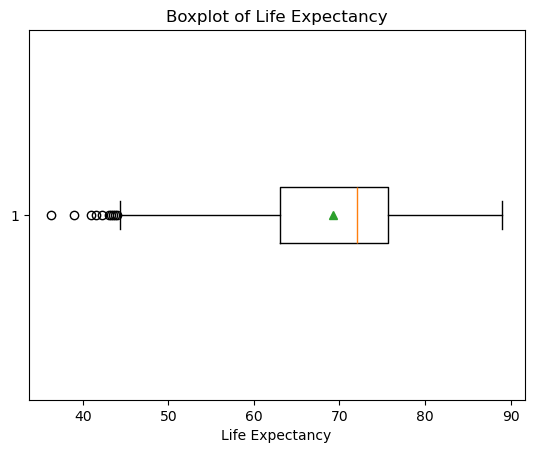

In [36]:
# plotting the distribution to see how life expectancy values spread across countries
plt.figure()
plt.hist(df['Life expectancy'], bins=30, density=True, color='green', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Density')
plt.savefig('../Desktop/life-expectancy-who/img/distribution.png', dpi=300, bbox_inches='tight')
plt.show();

plt.figure()
plt.boxplot(df['Life expectancy'], vert=False, showmeans=True)
plt.title('Boxplot of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

#### Correlations and Relationships
Check linear relationships with predictors like GDP, Schooling, BMI and Alcohol.


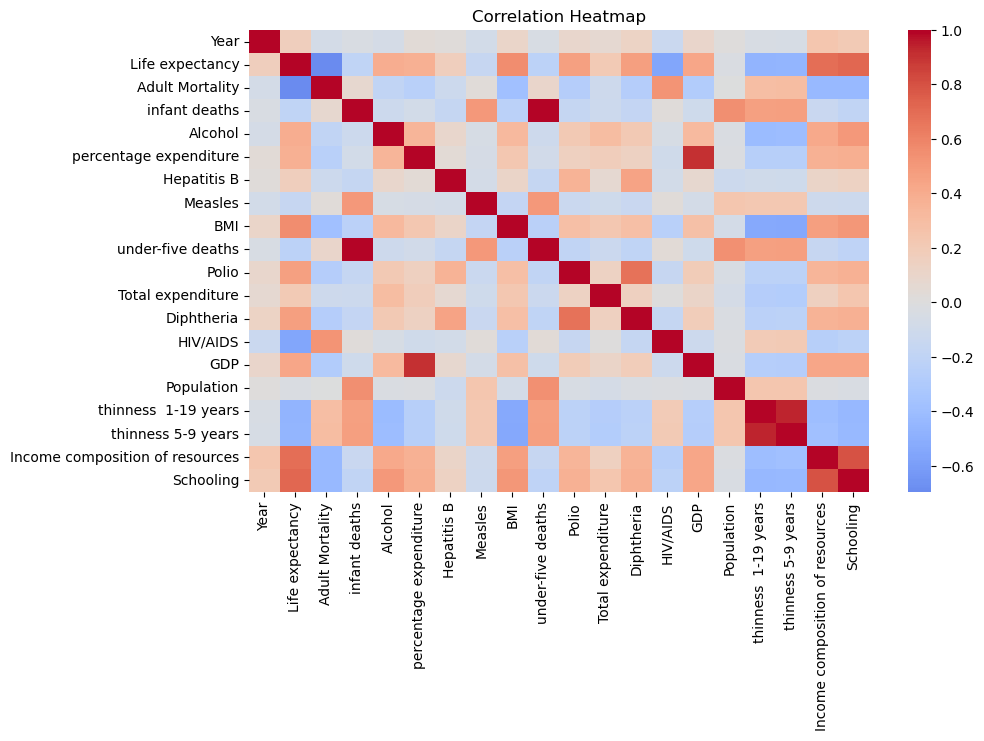

In [37]:
#correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('../Desktop/life-expectancy-who/img/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show();

In [12]:
# Quick correlations with life expectancy
corr['Life expectancy'].sort_values(ascending=False).head(10)

Life expectancy                   1.000
Schooling                         0.717
Income composition of resources   0.689
BMI                               0.559
Diphtheria                        0.473
Polio                             0.459
GDP                               0.431
Alcohol                           0.391
percentage expenditure            0.382
Total expenditure                 0.210
Name: Life expectancy, dtype: float64

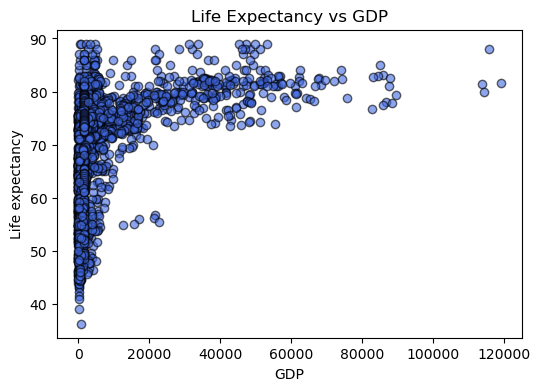

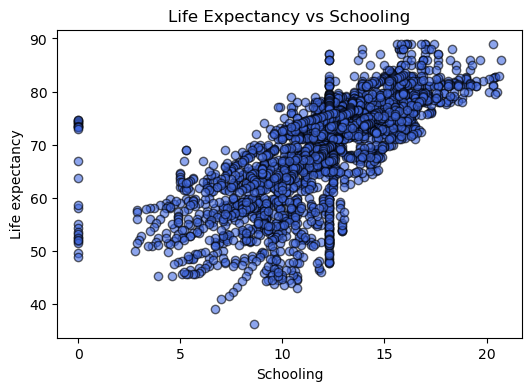

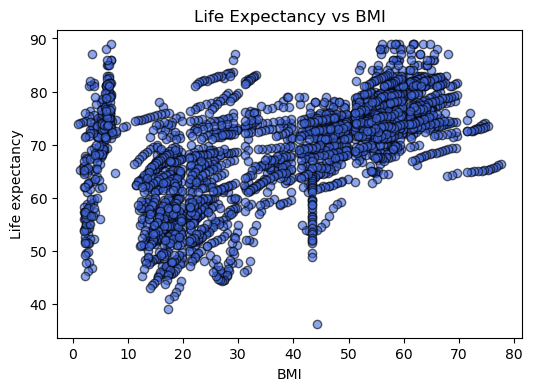

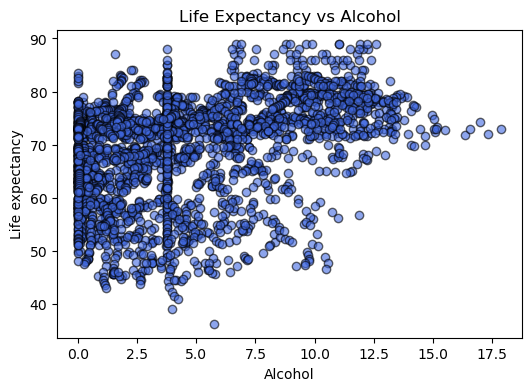

In [12]:
# scatter plot
predictors = ['GDP', 'Schooling', 'BMI', 'Alcohol']

for col in predictors:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['Life expectancy'], alpha=0.6, color='royalblue', edgecolor='black')
    plt.title(f'Life Expectancy vs {col}')
    plt.xlabel(col)
    plt.ylabel('Life expectancy')
    plt.savefig(f'../Desktop/life-expectancy-who/img/Life_Expectancy_vs_{col.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show();

#### Confidence interval

In [16]:
# calculating a 95% confildence interval for the average life expectancy
from scipy import stats

confidence = 0.95
n = len(df['Life expectancy'])
mean = df['Life expectancy'].mean()
std_error = stats.sem(df['Life expectancy'])

# margin of error
margin = std_error * stats.t.ppf((1 + confidence) / 2, n-1)
lower, upper = mean - margin, mean + margin

print(f'95% confildence interval for the average life Expectancy: {lower:.2f} to {upper:.2f}')

95% confildence interval for the average life Expectancy: 68.88 to 69.57


## Part 2 - Hypothesis Testing
**Question:**
Is there a statistically significant difference in **Life Expectancy** between *Developed* and *Developing* countries?

In [21]:
# compare life expectancy between developed and developing countries
developed = df[df['Status'] == 'Developed']['Life expectancy']
developing = df[df['Status'] == 'Developing']['Life expectancy']

# perform t-test
t_stat, p_val = stats.ttest_ind(developed, developing, equal_var=False)

print(f'T-statistic: {t_stat:.3f}')
print(f'P-value: {p_val:.6f}')

# interpret the result
if p_val < 0.05:
    print('✅ There is a statistically significant difference in life expectancy.')
else:
    print('❌ No statistically difference found.')

T-statistic: 47.868
P-value: 0.000000
✅ There is a statistically significant difference in life expectancy.


#### Interpretation
The T-statistic(47.868) is extremely large, with a p-value equal to zero indicates **a very statistically significant difference** in average life expectancy between developed and developing countries.
The result suggets  that developed countries cobsistently experience much higher life expectancies — likely due to better healthcare systems, higher living standards and greater educational access.
Such a T-value indicates that this difference is not random but reflects a real gap in global health outcomes.

## Part 3 - Linear Regression (scikit-learn)
**Goal**
Predict **Life expectancy** using socioeconomic indicators —  specifically *Schooling, GDP, BMI,* and *Alcohol consumption.*

This model will help quantify how each factor contributes to changes in life expectancy.

In [27]:
# Select numeric features and target
features = ['Schooling', 'GDP', 'BMI', 'Alcohol']
target = 'Life expectancy'

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.3f}')

MAE: 4.38
RMSE: 5.79
R² Score: 0.612


In [28]:
# Coefficients and interpretations
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
display(coef_df)

print(f'Intercept: {model.intercept_:.3f}')

,Feature,Coefficient
0,Schooling,1.533
1,GDP,0.000
2,BMI,0.122
3,Alcohol,0.018


Intercept: 45.402


#### Visualization: Predicted vs Actual

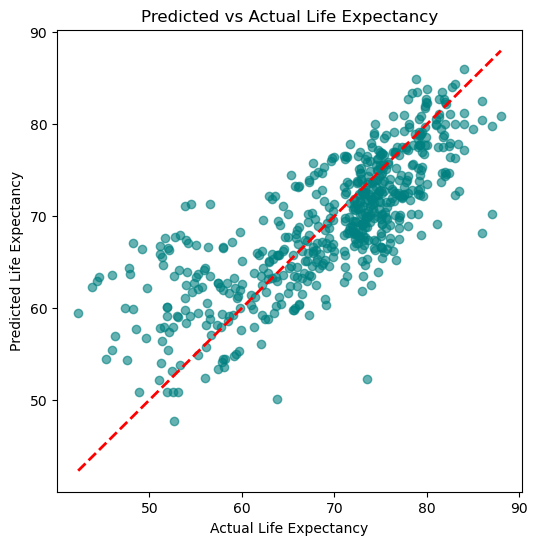

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.savefig('../Desktop/life-expectancy-who/img/Predicted vs Actual Life Expectancy.png', dpi=300, bbox_inches='tight')
plt.show();

#### Interpretation
The model suggests that education(schooling years) has the strongest positive impact on life expectancy.
For every additional year of schooling , life expectancy increases by approximately 1.5 years on average.
    
GDP showed little influence, possibly because its effect overlaps with other  factors such as education
BMI and Alcohol have small positive relationships, indicating mild correlation but not major predictors

The model explains about 61% of the variation in life expectancy (R² = 0.612), which is  reasonable  for socail and economic data.
Overall, the results highlight the importance of education and basic health indicatorsin improving life expectancy

## Part 4 - Conclusion and Key Insights
This analysis used WHO life expectancy data to explore how social and economic factors influence longevity across countries.
Education (schooling) emerged as the  strongest posutive predictor of life expectancy, while GDP and lifestyle factors like BMI and Alcohol showed smaller effects.

The hypothesis test confirmed that developed countries have significantly higher average life expectancies than developing countries, a result strongly supported by the regression model (R² = 0.612).

Overall, the findings highlight the importance of education, publiv health investment, and socioeconomic stability in improving life expectancy worldwide.